###### Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import NuSVR,SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Meet\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


###### uploading the dataset

In [2]:
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,M,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,F,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,M,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,I,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7


### EDA

In [3]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (4177, 9)


In [4]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


There are 4177 rows and 9 columns,
Sex is object type variable. Target varibale is continous and interger type.

In [6]:
df.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

covert categorical into numeric type

In [7]:
df.Sex = df.Sex.map({'M':0, 'F':1, 'I':2})

<AxesSubplot:xlabel='Sex', ylabel='count'>

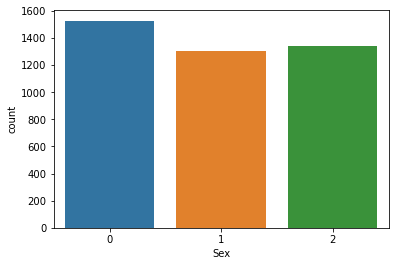

In [8]:
sns.countplot(x='Sex',data=df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [10]:
df=df.drop(['Sex'],axis=1)
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.46,0.36,0.10,0.51,0.22,0.10,0.15,15
1,0.35,0.27,0.09,0.23,0.10,0.05,0.07,7
2,0.53,0.42,0.14,0.68,0.26,0.14,0.21,9
3,0.44,0.36,0.12,0.52,0.22,0.11,0.15,10
4,0.33,0.26,0.08,0.20,0.09,0.04,0.06,7
...,...,...,...,...,...,...,...,...
4172,0.56,0.45,0.17,0.89,0.37,0.24,0.25,11
4173,0.59,0.44,0.14,0.97,0.44,0.21,0.26,10
4174,0.60,0.47,0.20,1.18,0.53,0.29,0.31,9
4175,0.62,0.48,0.15,1.09,0.53,0.26,0.30,10


In [11]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00
mean,0.52,0.41,0.14,0.83,0.36,0.18,0.24,9.93
std,0.12,0.10,0.04,0.49,0.22,0.11,0.14,3.22
min,0.07,0.06,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.45,0.35,0.12,0.44,0.19,0.09,0.13,8.00
50%,0.55,0.42,0.14,0.80,0.34,0.17,0.23,9.00
75%,0.61,0.48,0.17,1.15,0.50,0.25,0.33,11.00
max,0.81,0.65,1.13,2.83,1.49,0.76,1.00,29.00


###### huge difference in quartile range of height, whole wieght, shuckled wieght,Viscera weight& shell wieght which means possible outliers in columns

<Figure size 432x288 with 0 Axes>

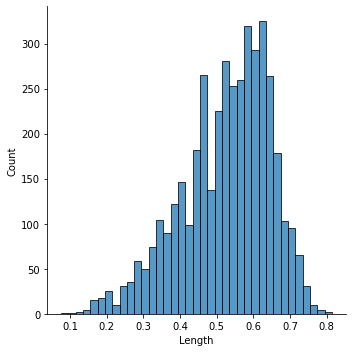

<Figure size 432x288 with 0 Axes>

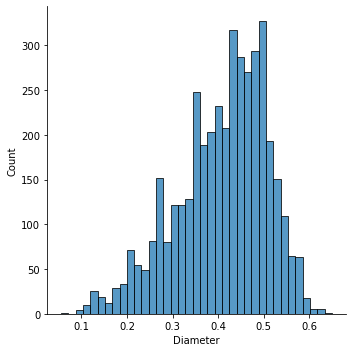

<Figure size 432x288 with 0 Axes>

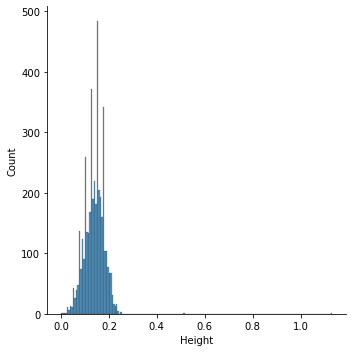

<Figure size 432x288 with 0 Axes>

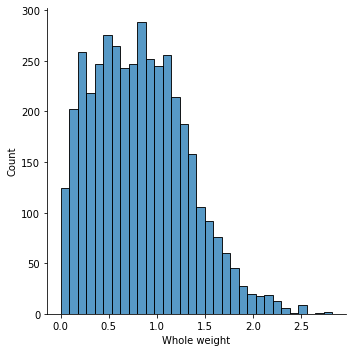

<Figure size 432x288 with 0 Axes>

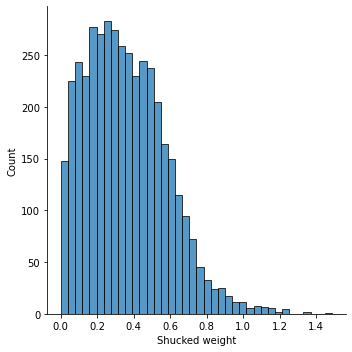

<Figure size 432x288 with 0 Axes>

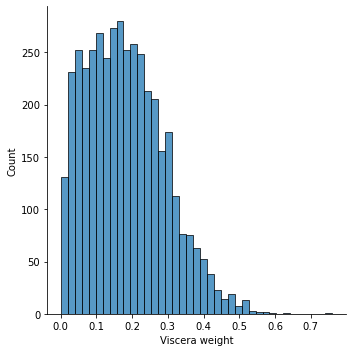

<Figure size 432x288 with 0 Axes>

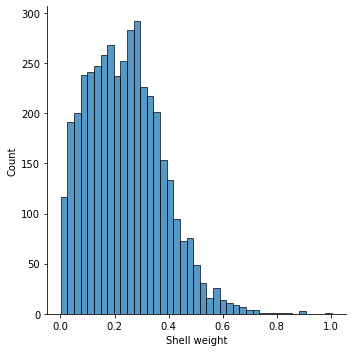

<Figure size 432x288 with 0 Axes>

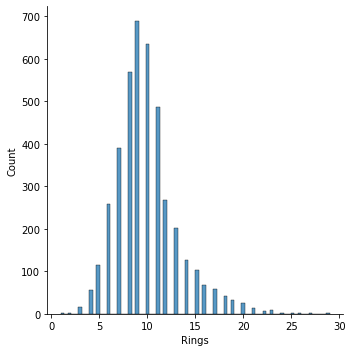

In [12]:
# ploting graph for alll the coulmns in one go
columns=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']
for i in df[columns]:
    plt.figure()
    sns.displot(df[i])

 Height is normally distributed and other variables are postively skewed.

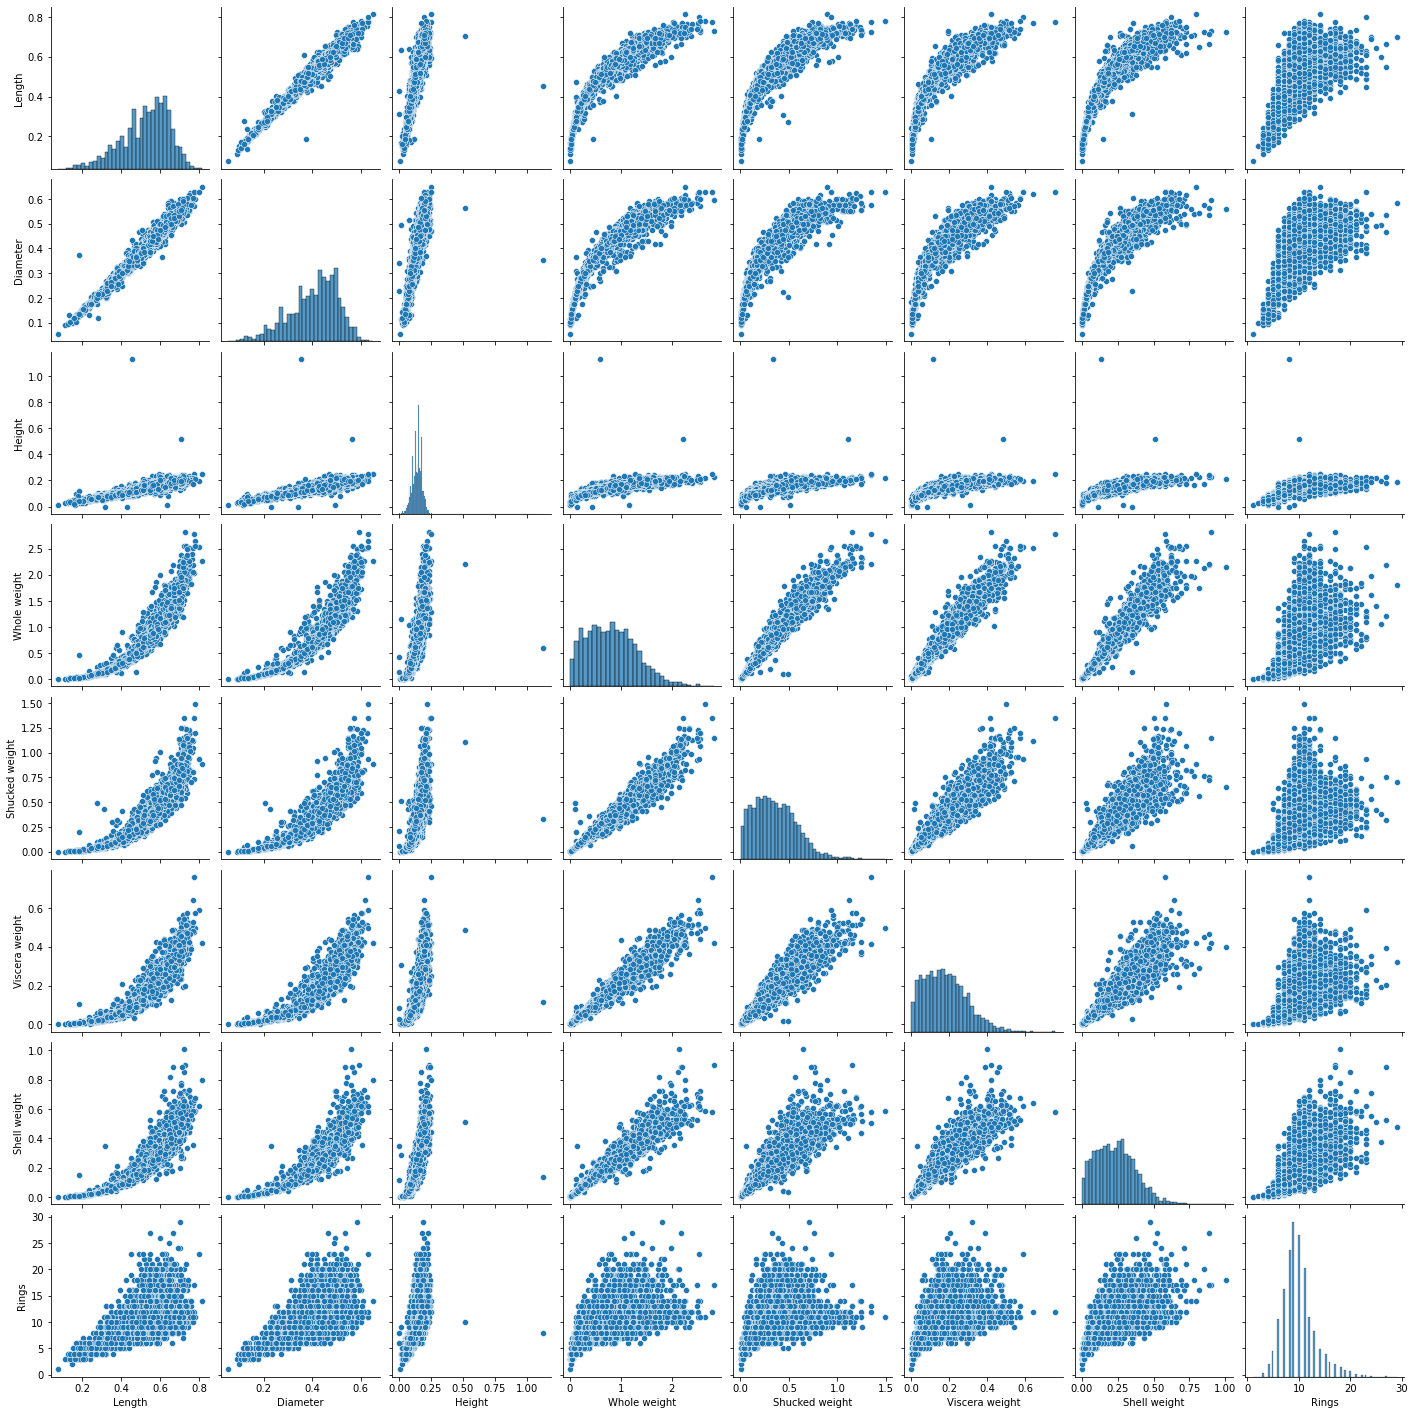

In [13]:
sns.pairplot(df)

#### Correlation

In [14]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.00,0.99,0.83,0.93,0.90,0.90,0.90,0.56
Diameter,0.99,1.00,0.83,0.93,0.89,0.90,0.91,0.57
Height,0.83,0.83,1.00,0.82,0.77,0.80,0.82,0.56
Whole weight,0.93,0.93,0.82,1.00,0.97,0.97,0.96,0.54
Shucked weight,0.90,0.89,0.77,0.97,1.00,0.93,0.88,0.42
Viscera weight,0.90,0.90,0.80,0.97,0.93,1.00,0.91,0.50
Shell weight,0.90,0.91,0.82,0.96,0.88,0.91,1.00,0.63
Rings,0.56,0.57,0.56,0.54,0.42,0.50,0.63,1.00


<AxesSubplot:>

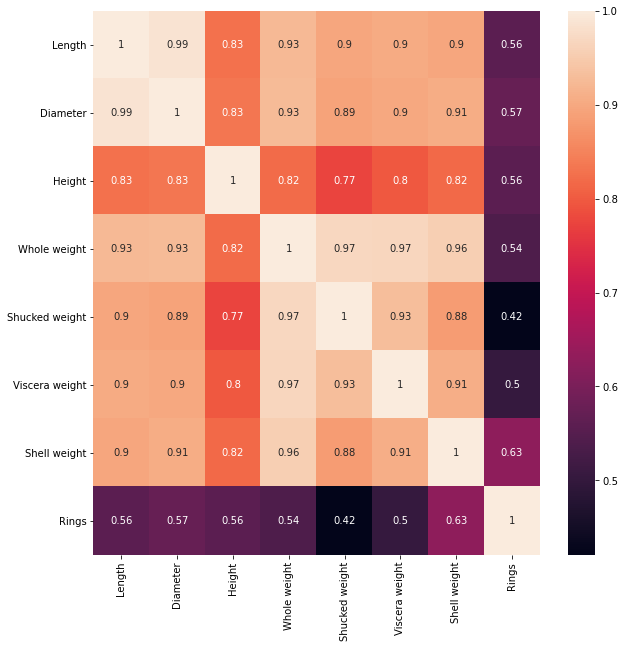

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,ax=ax)

### Checking Outliers & Sknewness

Length               AxesSubplot(0.125,0.657941;0.168478x0.222059)
Diameter          AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Height            AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Whole weight      AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Shucked weight       AxesSubplot(0.125,0.391471;0.168478x0.222059)
Viscera weight    AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Shell weight      AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Rings             AxesSubplot(0.731522,0.391471;0.168478x0.222059)
dtype: object

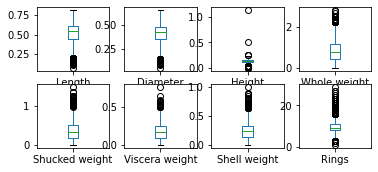

In [16]:
df.plot(kind='box',subplots=True,layout=(3,4))

<AxesSubplot:>

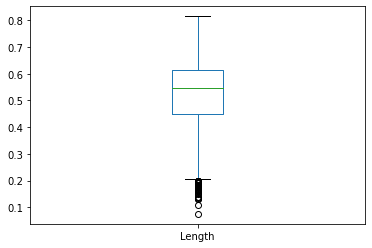

In [17]:
df['Length'].plot.box()

<AxesSubplot:>

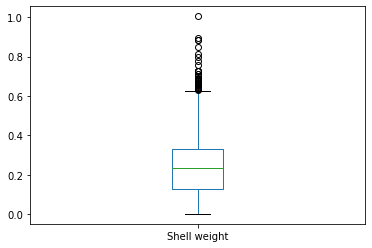

In [18]:
df['Shell weight'].plot.box()

<AxesSubplot:>

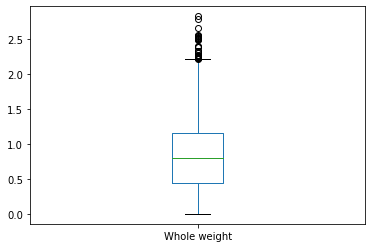

In [19]:
df['Whole weight'].plot.box()

<AxesSubplot:>

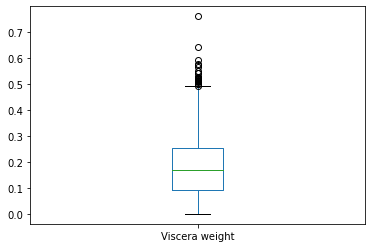

In [20]:
df['Viscera weight'].plot.box()

###### outliers are present almost in every column, let's remove them

In [21]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

print(df.shape)
#find how many rows are left in the dataframe 
data_clean.shape

(4177, 8)


(3781, 8)

<AxesSubplot:xlabel='Length'>

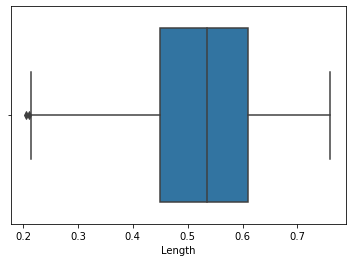

In [22]:
sns.boxplot(data_clean['Length'])

In [23]:
z_scr=zscore(data_clean)
print(data_clean.shape)
df_new=data_clean.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(3781, 8)
(3764, 8)


<AxesSubplot:xlabel='Length'>

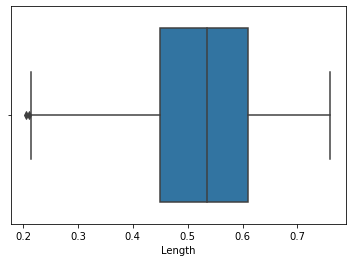

In [24]:
sns.boxplot(df_new['Length'])

In [25]:
Q1 = df_new.quantile(q=.25)
Q3 = df_new.quantile(q=.75)
IQR = df_new.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df_new[~((df_new < (Q1-1.5*IQR)) | (df_new > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(3762, 8)

<AxesSubplot:xlabel='Length'>

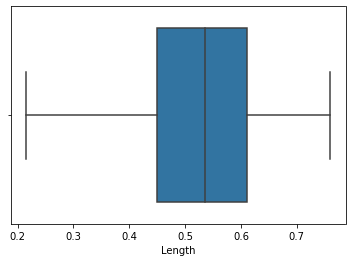

In [26]:
sns.boxplot(data_clean['Length'])

<AxesSubplot:xlabel='Diameter'>

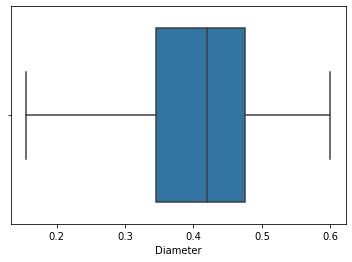

In [27]:
sns.boxplot(data_clean['Diameter'])

<AxesSubplot:xlabel='Shucked weight'>

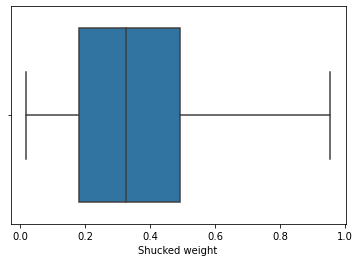

In [28]:
sns.boxplot(data_clean['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight'>

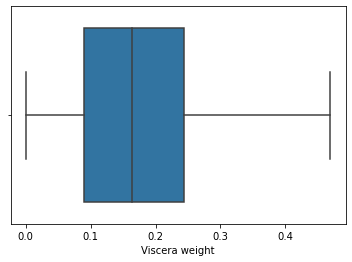

In [29]:
sns.boxplot(data_clean['Viscera weight'])

<AxesSubplot:xlabel='Shell weight'>

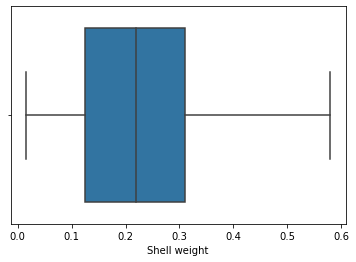

In [30]:
sns.boxplot(data_clean['Shell weight'])

<AxesSubplot:xlabel='Whole weight'>

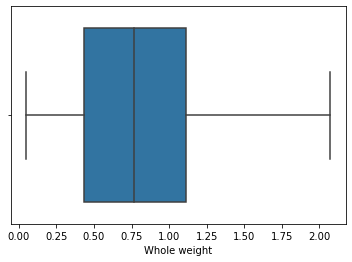

In [31]:
sns.boxplot(data_clean['Whole weight'])

##### outliers removed 

### Check Normal Distribution

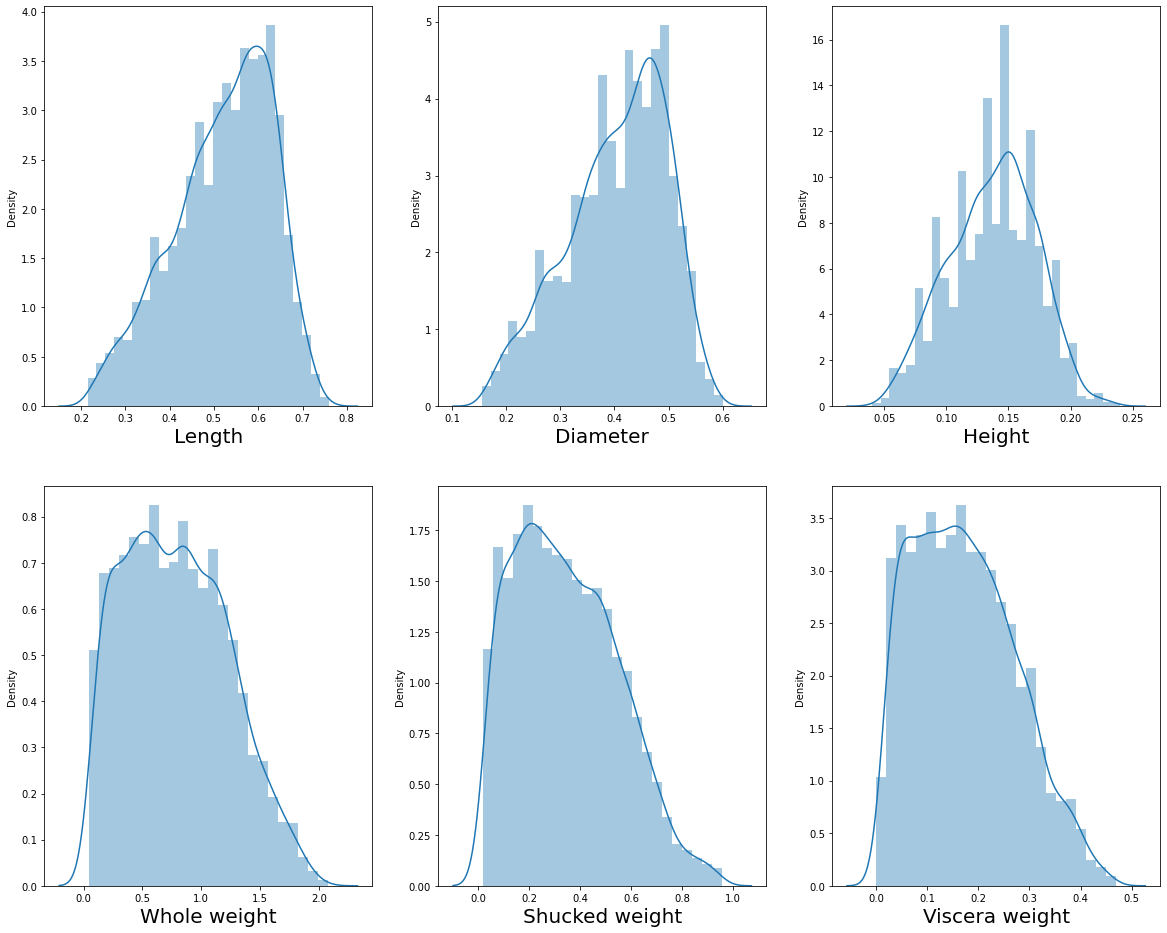

In [32]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data_clean.columns:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_clean[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

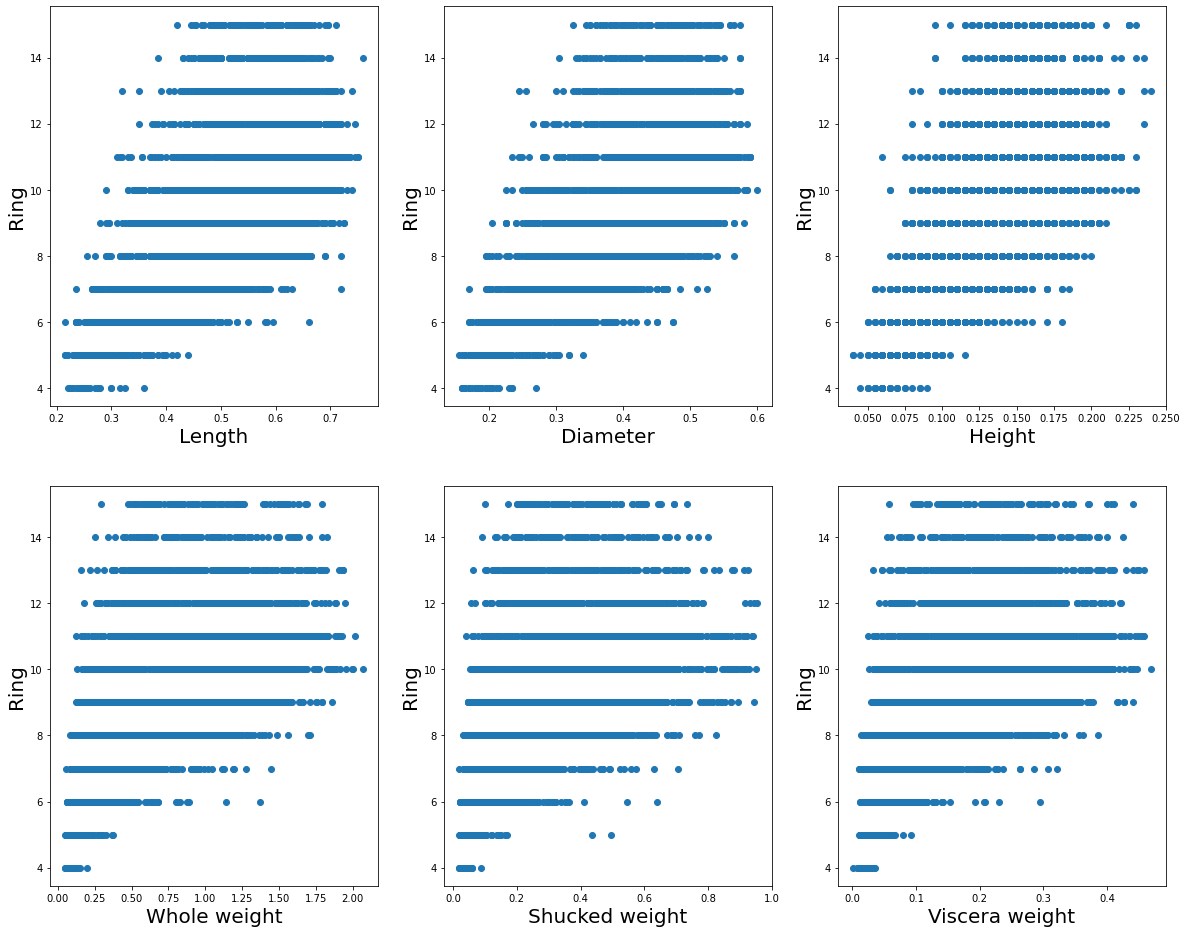

In [33]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in data_clean.columns:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(data_clean[i],data_clean['Rings'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Ring',fontsize=20)
    plotnumber+=1
plt.show()

increase in feature value increases value of ring value

In [34]:
y = data_clean[['Rings']].values
x = data_clean.drop(columns = ['Rings'])

In [35]:
y

array([[15],
       [ 7],
       [ 9],
       ...,
       [ 9],
       [10],
       [12]], dtype=int64)

In [36]:
print(x.skew())

Length           -0.50
Diameter         -0.49
Height           -0.15
Whole weight      0.32
Shucked weight    0.45
Viscera weight    0.42
Shell weight      0.30
dtype: float64


In [37]:
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

##### Scaling

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

#### PCA used for dimension reduction

In [39]:
for i in range(2,8):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X_scaled)
    print(i,sum(pca.explained_variance_ratio_))

2 0.9582506599028338
3 0.9765616064287007
4 0.9878222341050824
5 0.9971157493465745
6 0.9990417007895934
7 1.0


In [40]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_scaled)

#### finding best random state

In [41]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,test_size=.22,random_state=i)
    mod= LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.527655360905148 on random state 110


In [42]:
x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,test_size=.20,random_state=110)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3009, 5)
(753, 5)
(3009, 1)
(753, 1)


3009 rows for training and 753 rows for testing

### Model Building & Evaluation

In [43]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)
print(models)

100%|██████████| 42/42 [00:12<00:00,  3.28it/s]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
NuSVR                                        0.57       0.57   1.54   
MLPRegressor                                 0.57       0.57   1.55   
SVR                                          0.57       0.57   1.55   
GradientBoostingRegressor                    0.55       0.56   1.57   
ExtraTreesRegressor                          0.54       0.54   1.59   
HistGradientBoostingRegressor                0.54       0.54   1.60   
LGBMRegressor                                0.54       0.54   1.60   
RandomForestRegressor                        0.54       0.54   1.60   
TransformedTargetRegressor                   0.53       0.53   1.62   
LinearRegression                             0.53       0.53   1.62   
Lars                                         0.53       0.53   1.62   
Ridge                                        0.53       0.53   1.62   
Bayesi

### Cross Validation to imporve model accuracy

In [44]:
nsvr = NuSVR()
mlp = MLPRegressor()
svr = SVR()
gbr = GradientBoostingRegressor()
etr = ExtraTreeRegressor()

In [45]:
nsvrscores =cross_val_score(nsvr,principalComponents,y,cv=5)
print(nsvrscores)
print(nsvrscores.mean(),nsvrscores.std())

[0.38042636 0.39605124 0.52586793 0.47881486 0.54804459]
0.4658409965986154 0.06737247810692588


In [46]:
mlpscores =cross_val_score(mlp,principalComponents,y,cv=5)
print(mlpscores)
print(mlpscores.mean(),mlpscores.std())

[0.44270317 0.35578058 0.55171893 0.47819168 0.5380428 ]
0.473287433646561 0.0708689877707371


In [47]:
svrscores =cross_val_score(svr,principalComponents,y,cv=5)
print(svrscores)
print(svrscores.mean(),svrscores.std())

[0.3416733  0.43992851 0.50880706 0.47024164 0.5620999 ]
0.4645500844177694 0.07377257749766997


In [48]:
gbrscores =cross_val_score(gbr,principalComponents,y,cv=5)
print(gbrscores)
print(gbrscores.mean(),gbrscores.std())

[0.41828521 0.34143379 0.54111662 0.47775081 0.51891182]
0.45949964923010145 0.07233590700281062


In [49]:
etrscores =cross_val_score(etr,principalComponents,y,cv=5)
print(etrscores)
print(etrscores.mean(),etrscores.std())

[ 0.04967519 -0.29895902  0.1025117   0.04115197 -0.12927232]
-0.0469784966093401 0.1481368906615723


best model is NuSVR against all evaluaion metrics

### Hyperparameter Tuning

In [50]:
parameters={"kernel":['linear', 'poly', 'rbf', 'sigmoid'],"C":[0.001,0.01,0.1,1,10],"gamma":['scale', 'auto']}

In [51]:
clf = GridSearchCV(NuSVR(), parameters, cv=5,scoring="r2")

In [52]:
clf.fit(principalComponents,y)

GridSearchCV(cv=5, estimator=NuSVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2')

In [53]:
clf.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [55]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,test_size=.20,random_state=i)
    mod= NuSVR()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.5905907624956275 on random state 83


In [56]:
x_train,x_test,y_train,y_test=train_test_split(principalComponents, y,random_state = 83,test_size=0.20,shuffle=True)
model=NuSVR(kernel='rbf',C=10,gamma='auto')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(model,x,y,cv=5)
print('cross val score',scores.mean())
print('std err',scores.std())

coeff of determination is: 0.5954746114651234
mean absolute error: 1.1981090814437798
mean squared error: 2.48288748250866
root mean square error: 1.5757180847184118
cross val score 0.4378678563208114
std err 0.07666036069598971


### Saving the model

In [57]:
joblib.dump(model,'Abalone.obj')

['Abalone.obj']